The objective of this project is to compare different Machine Learning algorithms and select the best algorithm after performing regression on a car sales data. lets see which ML alorithms best predicts the cost of the car.

In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler


In [449]:
#read the data
car_data = pd.read_csv(r"D:\kaggle_datasets\data.csv\data.csv")
print(car_data.head())                     

   Unnamed: 0       brand              model  color registration_date  year  \
0           0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995   
1           1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995   
2           2  alfa-romeo  Alfa Romeo Spider  black           02/1995  1995   
3           3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995   
4           4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996   

  price_in_euro power_kw power_ps transmission_type fuel_type  \
0          1300      148      201            Manual    Petrol   
1         24900      191      260            Manual    Petrol   
2          5900      110      150           Unknown    Petrol   
3          4900      110      150            Manual    Petrol   
4         17950      132      179            Manual    Petrol   

  fuel_consumption_l_100km fuel_consumption_g_km  mileage_in_km  \
0            10,9 l/100 km              260 g/km       160500.0   


In [450]:
print(car_data.columns)
print(car_data.shape)


Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')
(251079, 15)


In [451]:
print(car_data.isnull().sum())

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


In [452]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [453]:
print(car_data['color'].isnull().sum())
car_data=car_data.fillna(car_data.mean(numeric_only=True))

166


In [454]:
columns_to_fix = ['price_in_euro','power_ps', 'power_kw', 'mileage_in_km', 'fuel_consumption_g_km']  # your list

for col in columns_to_fix:
    # Convert to numeric (handles strings like '123', '123.5', etc. and turns bad ones into NaN)
    car_data[col] = pd.to_numeric(car_data[col], errors='coerce')
    
    # Fill missing values with the column mean
    car_data[col] = car_data[col].fillna(car_data[col].mean())


In [455]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  float64
 7   power_kw                  251079 non-null  float64
 8   power_ps                  251079 non-null  float64
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  float64
 13  mileage_in_km             251079 non-null  f

In [456]:
print(car_data.isnull().sum())

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                        0
power_ps                        0
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                   0
offer_description               1
dtype: int64


In [457]:
print(car_data['color'].unique())
print(car_data['model'].nunique(dropna=True))

['red' 'black' 'silver' 'grey' 'white' 'beige' 'blue' 'green' 'yellow'
 'gold' 'brown' 'bronze' 'violet' 'orange' nan]
1312


In [458]:
print(car_data['model'].unique())
print(car_data['model'].nunique(dropna=True))

['Alfa Romeo GTV' 'Alfa Romeo 164' 'Alfa Romeo Spider' ... 'Volvo XC40'
 'Volvo C40' 'Volvo']
1312


In [459]:
print(car_data['brand'].value_counts())

brand
volkswagen       33281
mercedes-benz    27226
audi             21161
opel             20388
bmw              19810
ford             18790
skoda            14039
seat             11949
renault           8694
toyota            8228
hyundai           6989
peugeot           5848
kia               5734
fiat              5039
mini              4295
mazda             4211
volvo             4164
citroen           4083
porsche           3958
nissan            3784
dacia             3367
land-rover        3073
jeep              1749
smart             1643
alfa-romeo        1437
jaguar            1398
mitsubishi         934
honda              785
maserati           698
dodge              669
ferrari            590
bentley            541
lamborghini        361
ssangyong          342
aston-martin       277
saab               233
isuzu              206
daihatsu           204
chevrolet          191
lada               191
cadillac           157
infiniti           112
lancia             105
daewo

In [460]:
car_data_audi=car_data[car_data['brand'] == 'audi']
print(car_data_audi)

       Unnamed: 0 brand       model   color registration_date  year  \
1714         1714  audi     Audi A4  silver           08/1997  1997   
1715         1715  audi     Audi A4  silver           09/1997  1997   
1716         1716  audi     Audi A4  silver           12/1997  1997   
1717         1717  audi     Audi A4  silver           06/1997  1997   
1718         1718  audi     Audi A3  silver           05/1997  1997   
...           ...   ...         ...     ...               ...   ...   
22870       22870  audi  Audi TT RS  orange           01/2023  2023   
22871       22871  audi     Audi Q3  orange           05/2023  2023   
22872       22872  audi     Audi Q3  orange           05/2023  2023   
22873       22873  audi     Audi Q3  orange           05/2023  2023   
22874       22874  audi    Audi RS3    gold           04/2023  2023   

       price_in_euro  power_kw  power_ps transmission_type fuel_type  \
1714          1999.0      66.0      90.0            Manual    Diesel   
171

In [461]:
print(car_data_audi['model'].unique)
print(car_data_audi['power_ps'].unique())
print(car_data_audi['transmission_type'].unique())
print(car_data_audi['fuel_type'].unique())

<bound method Series.unique of 1714        Audi A4
1715        Audi A4
1716        Audi A4
1717        Audi A4
1718        Audi A3
            ...    
22870    Audi TT RS
22871       Audi Q3
22872       Audi Q3
22873       Audi Q3
22874      Audi RS3
Name: model, Length: 21161, dtype: object>
[ 90.         101.         125.         165.         110.
 299.         340.         150.         193.         224.
 209.         179.         310.         230.         260.
 265.         102.         170.         360.          75.
 252.         174.         116.         250.         381.
 131.         155.         171.80952609  61.         163.
 220.         320.         181.         105.         450.
 344.         334.         140.         280.         262.
 275.         190.         177.         182.         103.
 232.         507.         211.         256.         173.
 510.         480.         200.         204.         306.
 349.         133.         239.         162.         326.
 435.     

In [462]:
car_data_audi = car_data_audi[(car_data_audi['model']=='Audi A4') &\
                          (car_data_audi['transmission_type']=='Automatic') &\
                            (car_data_audi['fuel_type']=='Diesel')                                                
                          ]  
print(car_data_audi.head())

      Unnamed: 0 brand    model   color registration_date  year  \
1987        1987  audi  Audi A4  silver           01/2001  2001   
1995        1995  audi  Audi A4    blue           07/2002  2002   
2081        2081  audi  Audi A4  silver           08/2002  2002   
2111        2111  audi  Audi A4  silver           10/2002  2002   
2147        2147  audi  Audi A4    blue           02/2003  2003   

      price_in_euro  power_kw  power_ps transmission_type fuel_type  \
1987          900.0      85.0     116.0         Automatic    Diesel   
1995         1600.0     120.0     163.0         Automatic    Diesel   
2081         1200.0     114.0     155.0         Automatic    Diesel   
2111         3300.0     133.0     181.0         Automatic    Diesel   
2147         3800.0      96.0     131.0         Automatic    Diesel   

     fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  \
1987             5,3 l/100 km            2016.408163       500000.0   
1995             7,1 l/100 k

In [463]:
print(car_data_audi.shape)
print(car_data_audi.columns)

(1378, 15)
Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')


In [464]:
car_data_audi['price_in_euro'] = car_data_audi['price_in_euro'].astype(int)
car_data_audi['power_kw'] = car_data_audi['power_kw'].astype(int)
car_data_audi['power_ps'] = car_data_audi['power_ps'].astype(int)
car_data_audi['fuel_consumption_g_km']=car_data_audi['fuel_consumption_g_km'].astype(str)
car_data_audi['fuel_consumption_g_km'] = car_data_audi['fuel_consumption_g_km'].str.extract(r'(\d+\.?\d*)')  # Extract numeric part
car_data_audi['fuel_consumption_g_km'] = car_data_audi['fuel_consumption_g_km'].astype(float)

car_data_audi['fuel_consumption_l_100km']=car_data_audi['fuel_consumption_l_100km'].astype(str)
car_data_audi['fuel_consumption_l_100km'] = car_data_audi['fuel_consumption_l_100km'].str.extract(r'(\d+\.?\d*)')  # Extract numeric part
car_data_audi['fuel_consumption_l_100km'] = car_data_audi['fuel_consumption_l_100km'].astype(float)

In [465]:
car_data_audi=car_data_audi.fillna(car_data_audi.mean(numeric_only=True))
print(car_data.isnull().sum())

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                        0
power_ps                        0
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                   0
offer_description               1
dtype: int64


In [466]:
numeric_columns = car_data_audi.select_dtypes(include='number')
print(numeric_columns)

       Unnamed: 0  price_in_euro  power_kw  power_ps  \
1987         1987            900        85       116   
1995         1995           1600       120       163   
2081         2081           1200       114       155   
2111         2111           3300       133       181   
2147         2147           3800        96       131   
...           ...            ...       ...       ...   
22792       22792          44488       150       204   
22810       22810          39980       150       204   
22811       22811          58450       150       204   
22832       22832          44488       150       204   
22835       22835          48630       150       204   

       fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  
1987                        5.0            2016.408163       500000.0  
1995                        7.0            2016.408163       232000.0  
2081                        7.0            2016.408163       211000.0  
2111                        7.0        

Only the column mileage_in_km and unnaamed had dtypes float/int.

Now, the dataset contains 297 datapoints and now they will be used to get idea on how differnt alogrithms perform.

In [467]:
#Creating pipeline
def predict(steps, car_data_audi):
    start = time.time()   #Records start time to measure execution duration
    r2 = []
    mape = []
    y = car_data_audi['price_in_euro'].values
    categorical_feat = car_data_audi[['transmission_type','fuel_type']]
    continuous_feat = car_data_audi[['power_ps','fuel_consumption_l_100km','power_kw','mileage_in_km','fuel_consumption_g_km']]
    dummies = pd.get_dummies(categorical_feat,drop_first=False)   
    car_data_audi = pd.concat([continuous_feat,dummies],axis=1)
    
    
    X = pd.concat([continuous_feat, dummies], axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    pipeline = make_pipeline(*steps)    #*steps unpacks the steps list
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test) 
    r2.append(r2_score(y_test, predictions))
    mape.append(mean_absolute_percentage_error(y_test, predictions))
    end = time.time()
    print(f'Completed in {np.round((end - start),decimals=2)} seconds\n\
Mean r2 value for all models is {np.round(sum(r2)/len(r2),decimals=2)}\n\
Mean mape value for all models is {np.round(sum(mape)/len(mape)*100,decimals=1)} %')
    return((X_train,y_train,X_test,y_test,predictions))

dummies = pd.get_dummies(categorical_feat,drop_first=False)
   Converts categorical variables to dummy/one-hot encoded variables
   drop_first=False keeps all dummy columns (no multicollinearity handling)

In [468]:
#creating plot function to visulalize the dataset
def plot_results(X_train,y_train,X_test,y_test,predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5),sharey=True)
    fig.tight_layout()
    ax1.scatter(x=X_train[:,1],y=y_train,color='blue',alpha=0.5,label='y_train')
    ax1.set_title('Training Data')
    ax1.set_ylabel('Price in Euro')
    ax1.legend()
    ax2.scatter(x=X_test[:,1],y=y_test,color='blue',alpha=0.5,label='y_test')
    ax2.scatter(x=X_test[:,1],y=predictions,color='red',alpha=0.5,label='predictions')
    ax2.set_title('Testing Data vs Predictions')
    ax2.legend()
    fig.text(0.5,-0.02, "Mileage in km", ha="center", va="center")
    plt.show()

In [469]:
#Linear Regression
(X_train,y_train,X_test,y_test,predictions) = predict((MinMaxScaler(), LinearRegression()),car_data_audi)

Completed in 0.01 seconds
Mean r2 value for all models is 0.63
Mean mape value for all models is 22.6 %


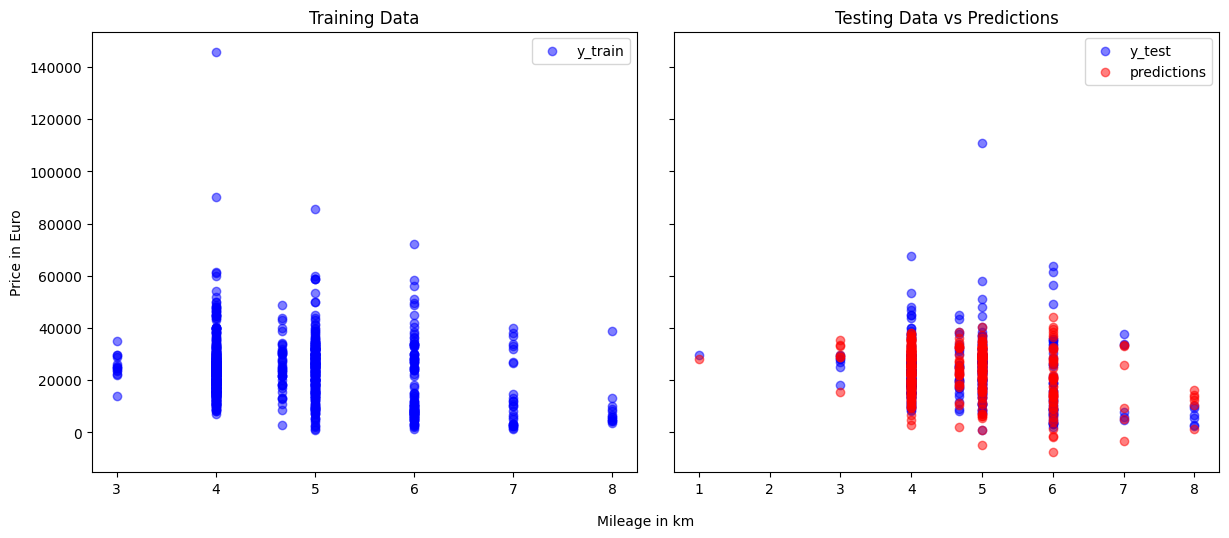

In [470]:
plot_results(X_train,y_train,X_test,y_test,predictions)

In [471]:
#K Neighbours Regression
(X_train,y_train,X_test,y_test,predictions) = predict((MinMaxScaler(), KNeighborsRegressor(n_neighbors=15)),car_data_audi)

Completed in 0.01 seconds
Mean r2 value for all models is 0.65
Mean mape value for all models is 19.1 %


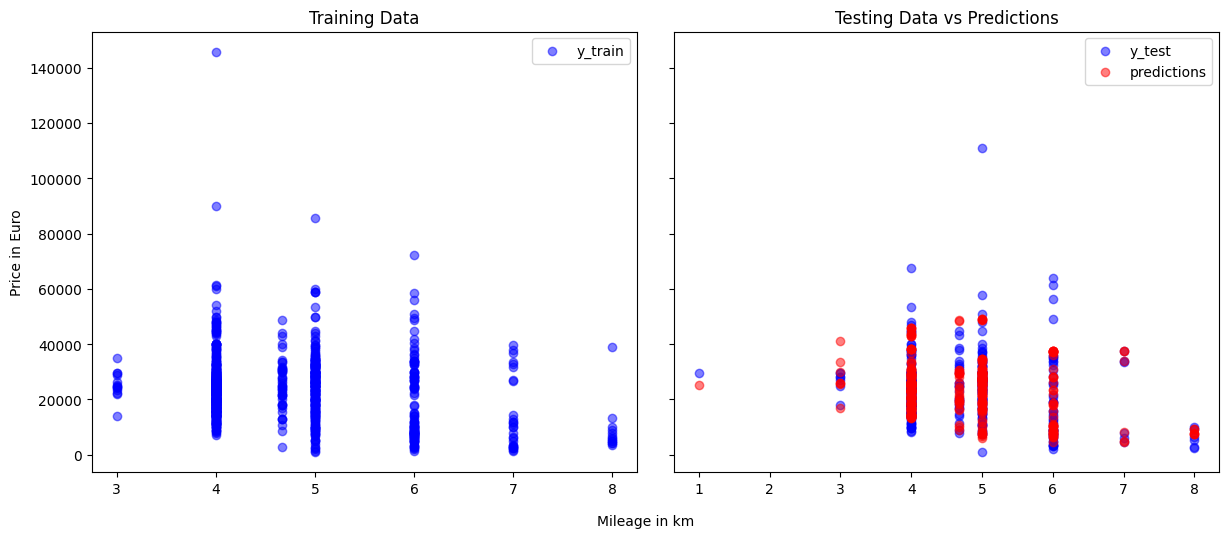

In [472]:
plot_results(X_train,y_train,X_test,y_test,predictions)

In [473]:
#Support Vector Machines Regression
(X_train,y_train,X_test,y_test,predictions) = predict(( MinMaxScaler(), SVR(C=2000)),car_data_audi)

Completed in 0.04 seconds
Mean r2 value for all models is 0.65
Mean mape value for all models is 18.2 %


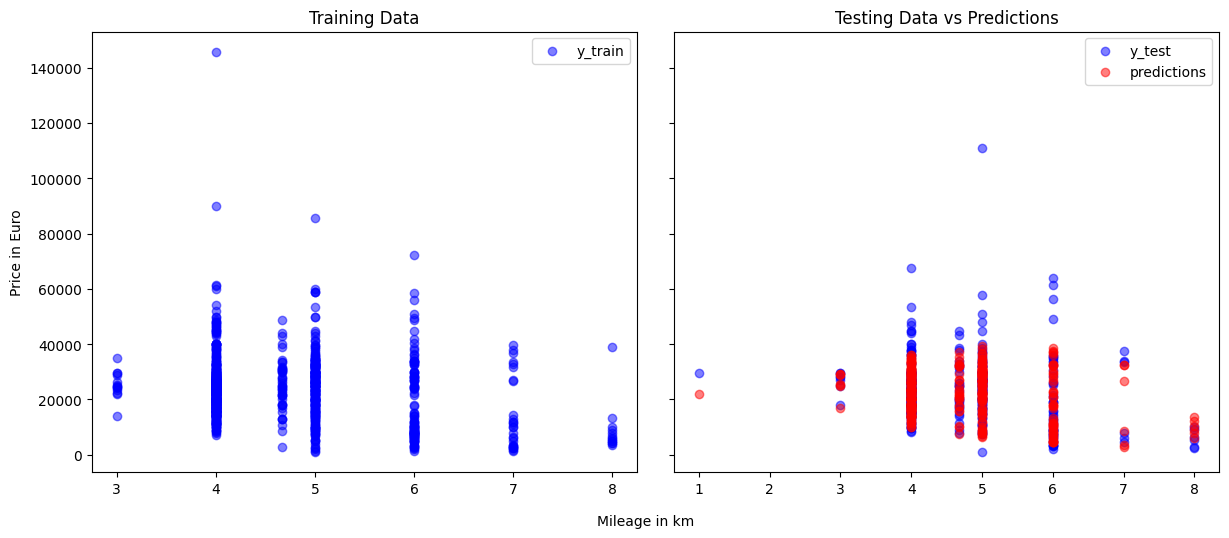

In [474]:
plot_results(X_train,y_train,X_test,y_test,predictions)

In [475]:
#Random Forest Regression
(X_train,y_train,X_test,y_test,predictions) = predict((MinMaxScaler(), RandomForestRegressor(n_estimators=100)),car_data_audi)

Completed in 0.2 seconds
Mean r2 value for all models is 0.6
Mean mape value for all models is 17.6 %


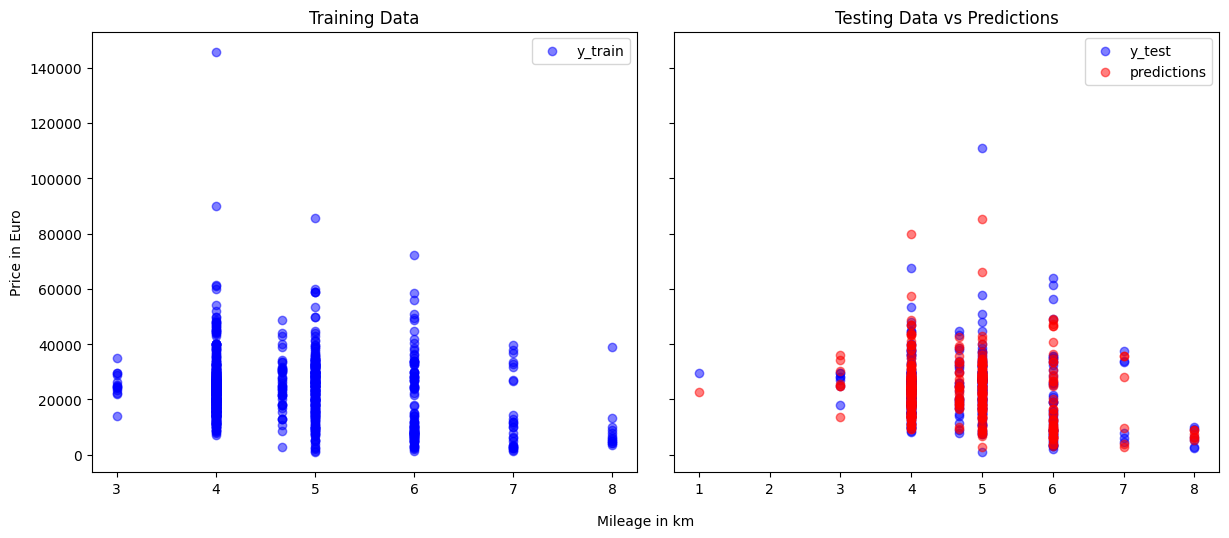

In [476]:
plot_results(X_train,y_train,X_test,y_test,predictions)

In [477]:
#Gradient Boost Regression 
(X_train,y_train,X_test,y_test,predictions) = predict((MinMaxScaler(), GradientBoostingRegressor()),car_data_audi)

Completed in 0.09 seconds
Mean r2 value for all models is 0.5
Mean mape value for all models is 17.4 %


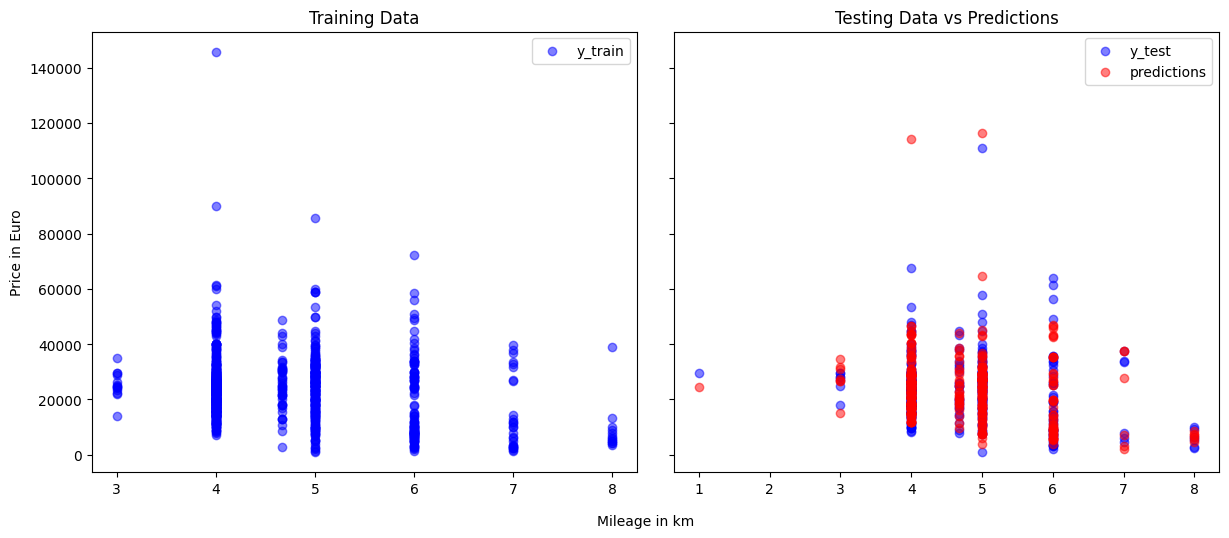

In [478]:
plot_results(X_train,y_train,X_test,y_test,predictions)

Conclusion: For Support Vector Machines Regression, Mean r2 value and mean mape value are 0.65 and 18.2% respectively. Similarly, For K Neighbours Regression,  Mean r2 value and mean mape value are 0.65 and 19.1% respectively.Since, SVM has lower mape value compred to knn, it is considered as best in this dataset.
Use SVM because:

Tied for highest R² (0.65) - excellent pattern understanding
Best MAPE among top performers (18.2%) - most accurate predictions
Optimal balance of pattern recognition + prediction accuracy
Most robust for car price prediction

In [479]:
print(car_data.shape)
print(car_data.columns)

(251079, 15)
Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')


In [480]:
print(car_data['fuel_consumption_g_km'].dtype)

car_data['power_ps'] = pd.to_numeric(car_data['power_ps'], errors='coerce')
print(car_data['power_ps'].dtype)

#car_data['fuel_consumption_g_km'] = car_data['fuel_consumption_g_km'].fillna(car_data['fuel_consumption_g_km'].mean())


float64
float64


In [481]:
car_data['fuel_consumption_g_km']=car_data['fuel_consumption_g_km'].astype(str)
car_data['fuel_consumption_g_km'] = car_data['fuel_consumption_g_km'].str.extract(r'(\d+\.?\d*)')  # Extract numeric part
car_data['fuel_consumption_g_km'] = car_data['fuel_consumption_g_km'].astype(float)
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  float64
 7   power_kw                  251079 non-null  float64
 8   power_ps                  251079 non-null  float64
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  float64
 13  mileage_in_km             251079 non-null  f

In [482]:
#Creating pipeline
def predict(steps, car_data):
    start = time.time()   #Records start time to measure execution duration
    r2 = []
    mape = []
    y = car_data['price_in_euro'].values
    categorical_feat = car_data[['transmission_type','fuel_type']]
    continuous_feat = car_data[['power_ps','power_kw','mileage_in_km','fuel_consumption_g_km']]
    dummies = pd.get_dummies(categorical_feat,drop_first=True)   
    car_data = pd.concat([continuous_feat,dummies],axis=1)
    
    
    X = pd.concat([continuous_feat, dummies], axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    pipeline = make_pipeline(*steps)    #*steps unpacks the steps list
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test) 
    r2.append(r2_score(y_test, predictions))
    mape.append(mean_absolute_percentage_error(y_test, predictions))
    end = time.time()
    print(f'Completed in {np.round((end - start),decimals=2)} seconds\n\
Mean r2 value for this model is {np.round(sum(r2)/len(r2),decimals=2)}\n\
Mean mape value for this model is {np.round(sum(mape)/len(mape)*100,decimals=1)} %')
    return((X_train,y_train,X_test,y_test,predictions))

In [483]:
#creating plot function to visulalize the dataset
def plot_results(X_train,y_train,X_test,y_test,predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5),sharey=True)
    fig.tight_layout()
    ax1.scatter(x=X_train[:,1],y=y_train,color='blue',alpha=0.5,label='y_train')
    ax1.set_title('Training Data')
    ax1.set_ylabel('Price in Euro')
    ax1.legend()
    ax2.scatter(x=X_test[:,1],y=y_test,color='blue',alpha=0.5,label='y_test')
    ax2.scatter(x=X_test[:,1],y=predictions,color='red',alpha=0.5,label='predictions')
    ax2.set_title('Testing Data vs Predictions')
    ax2.legend()
    fig.text(0.5,-0.02, "Mileage in km", ha="center", va="center")
    plt.show()

In [484]:
(X_train,y_train,X_test,y_test,predictions) = predict((MinMaxScaler(), LinearRegression()),car_data)

Completed in 3.35 seconds
Mean r2 value for this model is 0.31
Mean mape value for this model is 69.0 %


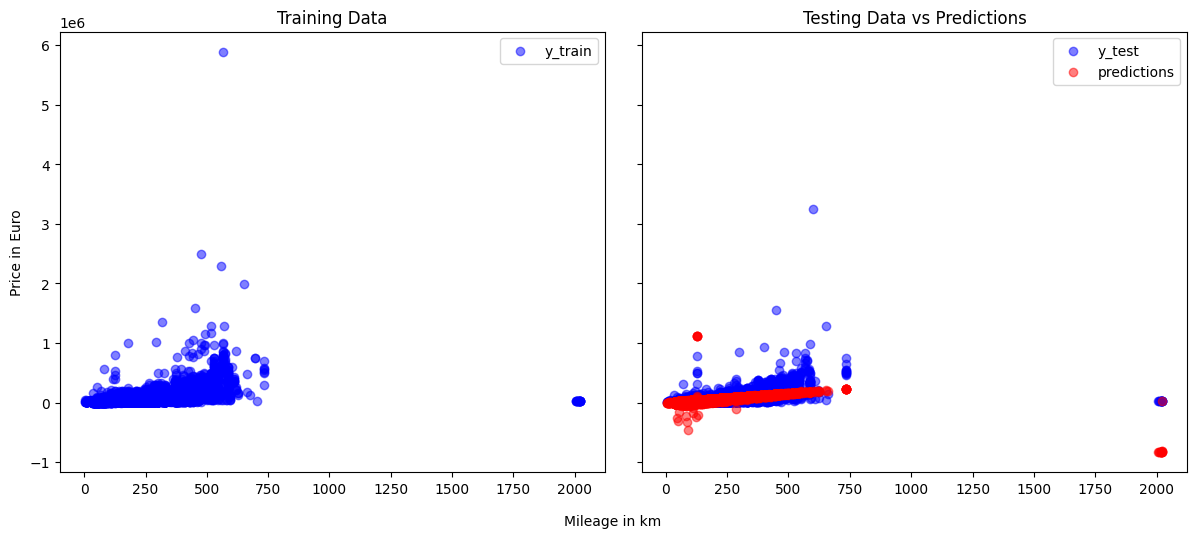

In [485]:
plot_results(X_train,y_train,X_test,y_test,predictions)

if i take data from all , it doesnt get train properly because the data is mismatched, contains differnt brand,model and many more specificaations.so, i took only one brand "audi"